# Programming Exercise 1: Linear Regression

This notebook is based on the [Coursera Machine Learning](https://www.coursera.org/learn/machine-learning) course by Andrew Ng. We believe it is the best course for people who are keen to make their first steps in Machine Learning.

The course is taught in Octave / MATLAB, but Python is much more broadly used in the industry and academia. The Python code in this tutorial is based on some work by [David Kaleko](https://github.com/kaleko). 

Explanations of the model, and any mistakes herein, are of our own doing. If you're unsure about anything, feel free to ask us during the session!

In [1]:
# Start by importing the libraries with the necessary functionality for ML
# in Python and for vanilla ML, that almost always includes NumPy

# the following line allows us to output plots in the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt # plotting library

The task of supervised learning is to train a model to predict a label $y$ given an input $x = (x_1, x_2, \dotsc, x_n)$, where $n$ is the number of input features. For example, $y$ as the target variable can be the price of a house, and $x$ is a vector consisting of $n$ features of the house, such as: the number of bedrooms, proximity to public transport, age of house, etc... Our task then is to build a model that can take these input features of the house and predict the price that the house will be sold at. 

To train a supervised machine-learning algorithm, you would need a bunch of labelled examples $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dotsc, (x^{(m)}, y^{(m)})\}$ which we call the **training data**, where $m$ is the number of datapoints. Using the above example, we would need a dataset containing the sold price of $m$ houses, along with the $n$ features for each of those houses.

A supervised machine learning model typically assumes that there exists a mapping from inputs to outputs, which we can represent as

$$ y = h_{\theta}(x) + \epsilon $$

where $h_{\theta}(x)$ is called a hypothesis and $\epsilon$ (pronounced $epsilon$) is a noise term that represents any error that cannot be accounted for by the hypothesis $h$. $\theta$ (pronounced $theta$) are the model parameters which we will want to tweak to make the predictions as accurate as possible (you will see what we mean in a bit).

Linear regression is one of the simplest ML models. It assumes that the mapping from $x$ to $y$ is linear in parameters (i.e. it is composed of the sum of model parameters):

$$ y = \theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n + \epsilon$$

where $\theta_1 x_1$ is $\theta_1$ times $x_1$, $x = (x_1, x_2, \dotsc, x_n)$ are the input variables for one data sample and $\theta = (\theta_0, \theta_1, \theta_2, \dotsc, \theta_n)$ are the model parameters to be learned.

Intuitively, the parameter $\theta_n$ in $\theta_n x_n$ denotes the slope or how much $y$ is expected to change with each unit change in $x_n$. $\theta$ can be either positive or negative, e.g. house price is expected to increase by $\theta_{bed}$ for every extra bedroom, or it is expected to decreased by $\theta_{transport}$ for every additional meter from a public transport link.

Note that we have a $\theta_n$ for each $x_n$ but we have one more additional term, $\theta_0$, which we call the bias. This can be interpreted as the *intercept* term, or what $y$ is expected to be in absence of any additional knowledge about $x_n$.

It is important to note that linearity is in parameters $\theta$, *not* the variables $x$. This means that a linear regression permits polynomials or interactions of original variables, for example:

$$ y = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \theta_3 x_2 + \theta_4 x_1x_2 + \epsilon$$

In theory, this permits the model to learn non-linear relationships between $y$ and (non-transformed) $x$. However, these non-linear relationships and interaction effects are not known a-priori. In practice, we tend to use the simplest model with no higher-order terms.

In general linear regression is not the most predictive model out of the box. Nonetheless, it is a very useful baseline in many contexts (and in industry) and benefits from the ease of interpretation and development.

## 1 Linear regression with one variable

Let's start with a simple linear regression model in one variable. You will implement linear regression with one
variable to predict profits for a food truck. 

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
The chain already has trucks in various cities and you have a dataset containing the profits and population size for $m$ cities.
The training data can be represented as $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dotsc, (x^{(m)}, y^{(m)})\}$ where $x^{(i)}$ represents the population (in 10k increment) and $y^{(i)}$ represents profit (in \$10k increment) of the $i$th city.

You would like to use this data to help you select which city to expand to next.

The file *ex1data1.txt* contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a
loss.


Consider output of the hypothesis $h_{\theta}$

$$ h_{\theta}(x) = \theta_0 + \theta_1 x. $$


Let's try to interpret this equation. It assumes that the relationship between $y$ and $x$ is linear -- meaning that if we increase $x$ by 1, $h_{\theta}(x)$ will increase by $\theta_1$ and if we increase $x$ by $47.1$, $h_{\theta}(x)$ will increase $47.1 \cdot \theta_1$, or $47.1$ times $\theta_1$. The term $\theta_0$ allows to shift the linear dependency between $h_{\theta}(x)$ and $x$ by a constant. When $x = 0$, $h_{\theta}(x)$ predicts $y$ to be exactly equal to $\theta_0$.

### 1.1 Loading the Data

In machine learning, we usually represent the data $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dotsc, (x^{(m)}, y^{(m)})\}$ as a matrix $X$ and a vector $y$ where
\begin{align}
    X &=
        \begin{bmatrix}
            x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
            x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
            \vdots & \vdots & \ddots & \vdots \\
            x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)} \\
        \end{bmatrix} &&\text{and}\\
    y &= 
        \begin{bmatrix}
            y^{(1)} \\
            y^{(2)} \\
            \vdots \\
            y^{(m)}
        \end{bmatrix}.
\end{align}

In the one dimensional case the matrix $X$ is just
\begin{align}
    X &=
        \begin{bmatrix}
            x^{(1)} \\
            x^{(2)} \\
            \vdots \\
            x^{(m)}
        \end{bmatrix}.
\end{align}

In [2]:
datafile = 'data/ex1data1.txt'
cols = np.loadtxt(datafile, delimiter=',', usecols=(
    0, 1), unpack=True)  # Read in comma separated data

# Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size  # number of training examples

### 1.2 Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

We focus on the inner workings of machine learning algorithms and therefore you do not need to fill in anything for plotting and model diagnostics. Simply execute the cells with matplotlib code to see what you have achieved so far!

Text(0.5, 0, 'Population of City in 10,000s')

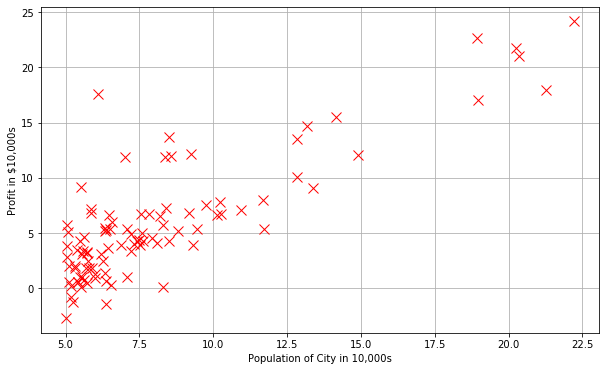

In [3]:
# Plot the data to see what it looks like
plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], y[:, 0], 'rx', markersize=10)
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

### 1.3 Gradient Descent

Linear regression assumes that we can predict $y$ using a linear model (using matrix notation):

$$ h_{\theta}(x) = \theta^Tx $$


This is just a much more concise way to write:

$$ h_{\theta}(x) = \theta_1 x_1 + \theta_2 x_2 + ... \theta_n x_n$$

---
#### Aside: Adding a Column of Ones to $X$ and the Expressing the Hypothesis Function in Vector Form

(Ask us for help if anything is unclear.)

How can we write the linear hypothesis in matrix form?

$$ h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n. $$

Recall that we can compactly write a set of linear equations as a matrix multiplication. For example
\begin{align}
    \begin{bmatrix}
        a & b \\
        c & d
    \end{bmatrix}
    \begin{bmatrix}
        e & f \\
        g & h
    \end{bmatrix} &=
    \begin{bmatrix}
        ae + bg & af + bh \\
        ce + dg & cf + dh
    \end{bmatrix} \\
    \begin{bmatrix}
        i & j \\
        k & l
    \end{bmatrix}
    \begin{bmatrix}
        m \\
        n
    \end{bmatrix} &=
    \begin{bmatrix}
        im + jn \\
        km + ln
    \end{bmatrix}\\
    \begin{bmatrix}
        o & p
    \end{bmatrix}
    \begin{bmatrix}
        q \\
        r
    \end{bmatrix} &=
    \begin{bmatrix}
        oq + pr
    \end{bmatrix}
\end{align}

With this in mind, we can write the linear hypothesis as following:
\begin{align}
    h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n =
    \begin{bmatrix}
        \theta_0 & \theta_1 & \cdots & \theta_n
    \end{bmatrix}
    \begin{bmatrix}
        1 \\
        x_1 \\
        \vdots \\
        x_n
    \end{bmatrix} =
    \theta^T x,
\end{align}
where we add a one in the $x$ vector which you can think of as the $x_0$ term:
\begin{align}
    x = \begin{bmatrix}
        1 \\
        x_1 \\
        \vdots \\
        x_n
    \end{bmatrix}.
\end{align}

Now, the above for a single observation and we have $m$ of those. The convention is to write the matrix of inputs $X$ as a $m \times (n + 1)$ matrix, where $n + 1$ is the number of variables *plus a constant term*:
\begin{align}
    X = \begin{bmatrix}
        1 & x_1^{(1)} & \cdots & x_n^{(1)} \\
        1 & x_1^{(2)} & \cdots & x_n^{(2)} \\
        \vdots & \vdots & \ddots & \vdots \\
        1 & x_1^{(m)} & \cdots & x_n^{(m)}
    \end{bmatrix}.
\end{align}
The first column is a column of ones such that when multiplied with the weights vector, we get the term $\theta_0$ added for every observation:
\begin{align}
    \begin{bmatrix}
        h_{\theta}(x^{(1)}) \\
        h_{\theta}(x^{(2)}) \\
        \vdots \\
        h_{\theta}(x^{(m)})
    \end{bmatrix} =
    \begin{bmatrix}
        \theta_0 + \theta_1 x_1^{(1)} + \cdots + \theta_n x_n^{(1)} \\
        \theta_0 + \theta_1 x_1^{(2)} + \cdots + \theta_n x_n^{(2)} \\
        \vdots \\
        \theta_0 + \theta_1 x_1^{(m)} + \cdots + \theta_n x_n^{(m)} \\
    \end{bmatrix} =
    \begin{bmatrix}
        1 & x_1^{(1)} & \cdots & x_n^{(1)} \\
        1 & x_1^{(2)} & \cdots & x_n^{(2)} \\
        \vdots & \vdots & \ddots & \vdots \\
        1 & x_1^{(m)} & \cdots & x_n^{(m)}
    \end{bmatrix}
    \begin{bmatrix}
        \theta_0 \\
        \theta_1 \\
        \vdots \\
        \theta_n
    \end{bmatrix} =
    X\theta
\end{align}
In the case of linear regression with a single variable, $X$ will have $ n + 1 = 2$ columns.

For convenience, we will consider $n$ to be the number of columns of $X$ with the ones added.

In [4]:
X = np.insert(X, 0, 1, axis=1)
m, n = X.shape

---

The task of training a model is therefore finding parameters $\theta$ such that $h_{\theta}(x)$ is as close as possible to true labels $y$. What does it mean for a prediction and a true label to be 'close'? We have to define a cost function that penalises deviations of our predictions from the truth and then proceed to search for parameters that minimize such deivations.

Linear regression models are trained using a *mean squared error* cost function:

$$ J(\theta) = \frac{1}{2m} \sum_{i = 1}^m \left(h_{\theta} (x^{(i)}) - y^{(i)} \right)^2 $$

where $m$ is the total number of examples in the training data.

The function above simply says: the cost is equal to the sum of errors for all observations in the training data, where each error is equal to the squared difference between the prediction and the true value of $y$. This function is continuous and yields itself to optimization via gradient-based methods. The mathematically inclined may notice that this is a convex function and hence it is possible to find a global minimum using gradient descent (in fact, linear regression has a closed form solution, but we will focus on gradient descent as a more general method of training ML models).


In [5]:
iterations = 1500
alpha = 0.01

In [9]:
def h(theta, X):  # Linear hypothesis function
    # this is equivalent to np.dot(X, theta)
    return X@theta


def computeCost(theta, X, y):  # Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    residual = h(theta, X) - y
    
#     (1. / (2 * m)) * np.dot(residual.T, residual)[0, 0]
    return (1. / (2 * m)) * (residual.T@residual)[0, 0]

#Test that running computeCost with 0's as theta returns 32.07:

initial_theta = np.zeros((X.shape[1], 1)) #(theta is a vector with n rows and 1 columns (if X has n features) )
print(computeCost(initial_theta, X, y))

32.072733877455676


Gradient descent is an iterative procedure where we update parameters in the direction of steepest descent (i.e. the direction that will reduce the cost function the most). How much we wish to move in that direction is controlled by a step size parameter $\alpha$. Hence, the formula is:

$$ \theta_{t+1} = \theta_t - \alpha  \frac{dJ}{d\theta} $$

The gradient for the cost function can be obtained by differentiating $J$ and is equal to:

$$ \frac{dJ}{d\theta_k} = \frac{1}{m}\sum_{i = 1}^m x_k^{(i)}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right) $$

In pseudocode, we can therefore write the gradient descent algorithm as following:

1. for t iterations do:
    $$(\theta_k)_t = (\theta_k)_{t-1} - \alpha  \frac{1}{m}\sum_{i = 1}^m x_k^{(i)}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right) $$
5. end

In [10]:

#Actual gradient descent minimizing routine
def descendGradient(X, y, theta_start=np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    
    # Store costs over GD iterations to plot them later!
    cost_history = []  
    
    # Store parameters over GD iterations to visualize how they change later
    theta_history = []
    for _ in range(iterations):
        theta_new = theta
        cost_history.append(computeCost(theta, X, y))

        theta_history.append(list(theta[:, 0]))

        for j in range(len(theta_new)):
            X_j = np.array(X[:, j]).reshape(m, 1)
            theta_new[j] = theta[j] - (alpha / m) * \
                np.sum((h(theta, X) - y) * X_j)
        theta = theta_new
    return theta, theta_history, cost_history

(4, 7)

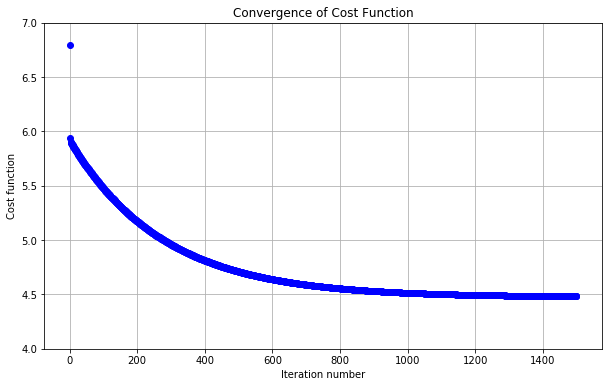

In [11]:
# Actually run gradient descent to get the best-fit theta values
initial_theta = np.zeros((X.shape[1], 1))
theta, theta_history, cost_history = descendGradient(X, y, initial_theta)

# Plot the convergence of the cost function
def plotConvergence(cost_history):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(cost_history)), cost_history, 'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    plt.xlim([-0.05 * iterations, 1.05 * iterations])

plotConvergence(cost_history)
plt.ylim([4, 7])

Looks like at every iteration we are improving our model! That is because the cost function $J$ defined above is strictly convex and with a unique global minimum. Consequently, every iteration, provided our step size $a$ is not too large, will lead to a decrease in the cost as we improve our parameters (weights). 

As an aside, many ML models that you may encounter in the future do not have convex cost functions with a unique global minimum, so in general you should not expect to see the same plot as above in all circumstances.

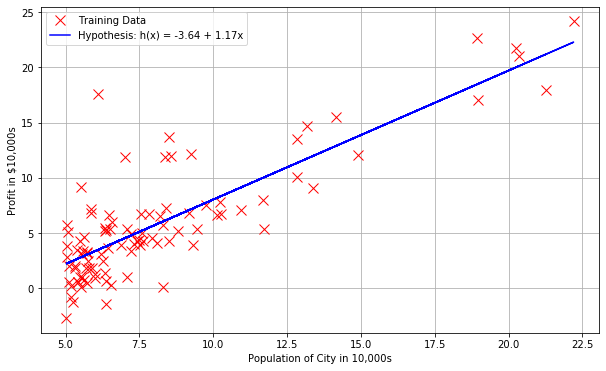

In [12]:
#Plot the line on top of the data to ensure it looks correct
def fit(xval):
    return theta[0] + theta[1] * xval


plt.figure(figsize=(10, 6))
plt.plot(X[:, 1], y[:, 0], 'rx', markersize=10, label='Training Data')
plt.plot(X[:, 1], fit(X[:, 1]), 'b-',
         label='Hypothesis: h(x) = %0.2f + %0.2fx' % (theta[0], theta[1]))
plt.grid(True)  # Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

#### 2.5 Visualizing _J($\theta$)_

As you perform gradient descent to learn minimize the cost function $J(\theta)$,
it is helpful to monitor the convergence by computing the cost. In this
section, you will implement a function to calculate $J(\theta)$ so you can check the
convergence of your gradient descent implementation.

To understand the cost function $J(\theta)$ better, you will now plot the cost over
a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. 

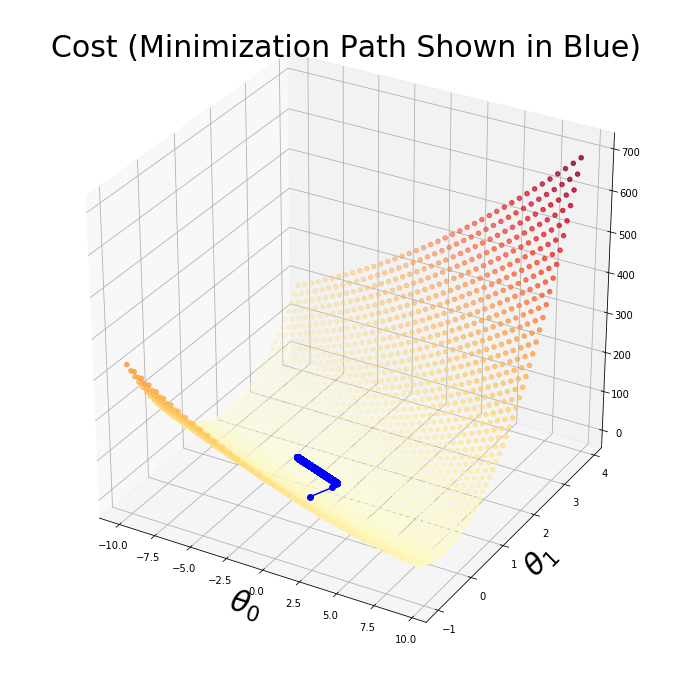

In [10]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10, 10, .5)
yvals = np.arange(-1, 4, .1)
myxs, myys, myzs = [], [], []
for i in xvals:
    for j in yvals:
        myxs.append(i)
        myys.append(j)
        myzs.append(computeCost(np.array([[i], [j]]), X, y))

scat = ax.scatter(myxs, myys, myzs, c=np.abs(myzs),
                  cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$', fontsize=30)
plt.ylabel(r'$\theta_1$', fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)', fontsize=30)
plt.plot([x[0] for x in theta_history], [x[1]
                                        for x in theta_history], cost_history, 'bo-')
plt.show()

### 3. EXTRA: Linear Regression with multiple variables

Linear regression with multiple variables is a straightforward extension of everything we have done up until now.

The target now becomes a linear function of several variables, each of which will need to be updated by gradient descent -- but in the same manner as for a single variable regression.

$$ h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n $$

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.


The file ex1data2.txt contains a training set of housing prices in Portland,
Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [11]:
datafile = 'data/ex1data2.txt'
# Read into the data file
cols = np.loadtxt(datafile, delimiter=',', usecols=(0, 1, 2),
                  unpack=True)  # Read in comma separated data

# Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size  # number of training examples

# Insert the usual column of 1's into the "X" matrix
X = np.insert(X, 0, 1, axis=1)

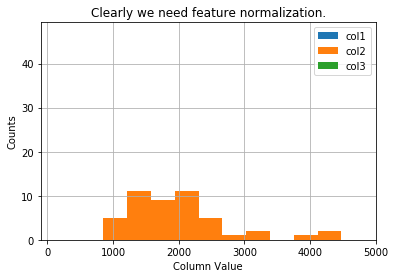

In [12]:
# Quick visualize data
plt.grid(True)
plt.xlim([-100, 5000])
plt.hist(X[:, 0], label='col1')
plt.hist(X[:, 1], label='col2')
plt.hist(X[:, 2], label='col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
plt.legend()

By looking at the values, note that house sizes are about
1000 times the number of bedrooms. When features differ by orders of magnitude,
first performing feature scaling can make gradient descent converge
much more quickly.

There are various ways to normalize features. In this session, we will cover mean-variance normalization: we scale each variable such that it has mean 0 and variance 1.

$$ x_j = \frac{x_j - \mu_j}{\sigma_j} $$

In [13]:
#Feature normalizing the columns (subtract mean, divide by standard deviation)
#Store the mean and std for later use
#Note don't modify the original X matrix, use a copy
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()

for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:, icol]))
    stored_feature_stds.append(np.std(Xnorm[:, icol]))
    # Skip the first column
    if not icol:
        continue
    # Faster to not recompute the mean and std again, just used stored values
    Xnorm[:, icol] = (Xnorm[:, icol] - stored_feature_means[-1]
                      ) / stored_feature_stds[-1]

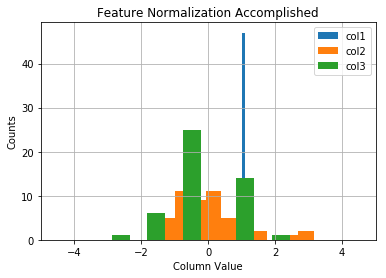

In [14]:
#Quick visualize the feature-normalized data
plt.grid(True)
plt.xlim([-5, 5])
plt.hist(Xnorm[:, 0], label='col1')
plt.hist(Xnorm[:, 1], label='col2')
plt.hist(Xnorm[:, 2], label='col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
plt.legend()

Previously, you implemented gradient descent on a univariate regression
problem. The only difference now is that there is one more feature in the
matrix X. The hypothesis function and the batch gradient descent update
rule remain unchanged.

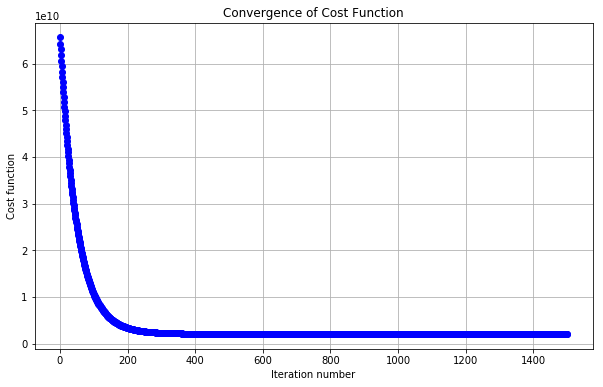

In [15]:
#Run gradient descent with multiple variables, initial theta still set to zeros
#(Note! This doesn't work unless we feature normalize! "overflow encountered in multiply")
initial_theta = np.zeros((Xnorm.shape[1], 1))
theta, theta_history, cost_history = descendGradient(Xnorm, y, initial_theta)

#Plot convergence of cost function:
plotConvergence(cost_history)

When training Machine Learning models, **it is essential to have a test set that the model does not see in the training process**. That is because we cannot assess model performance from the data that was used to train it -- any such assessment would be misleadingly optimistic, i.e. the model would appear more accurate that it actually would be when the time arrives to predict on unseen data!

We say that only unseen, or *test data*, can provide an unbiased model performance metric, such as accuracy.

When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard
deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before (i.e. the test data). Given a new x value (living room area and number of bedrooms),
we must first normalize x using the mean and standard deviation
*that we had previously computed from the training set*.

In [16]:
#print("Final result theta parameters: \n",theta)
print("Check of result: What is price of house with 1650 square feet and 3 bedrooms?")
ytest = np.array([1650., 3.])


# To "undo" feature normalization, we "undo" 1650 and 3, then plug it into our hypothesis
ytest_scaled = [(ytest[x] - stored_feature_means[x + 1]) /
               stored_feature_stds[x + 1] for x in range(len(ytest))]
ytest_scaled.insert(0, 1)
print("$%0.2f" % float(h(theta, ytest_scaled)))

Check of result: What is price of house with 1650 square feet and 3 bedrooms?
$293098.15


## Extra: Normal equations


As mentioned above, linear regression is one of the few ML models whose parameters can be solved for exactly, meaning that we can avoid an iterative procedure such as gradient descent. Formally, we say that a linear regression has a closed-form solution.

Let's return to matrix notation. We shall use matrix differentiation but do not worry if you do not understand some of the below - this is simply bonus material and can be equivalently derived without linear algebra.

$$ H =
    \begin{bmatrix}
        h_{\theta}(x^{(1)}) \\
        h_{\theta}(x^{(2)}) \\
        \vdots \\
        h_{\theta}(x^{(m)})
    \end{bmatrix} = X\theta $$

$$ J(\theta) = \frac{1}{2m}(y - X\theta)^T(y - X\theta) $$

$$ \frac{dJ}{d\theta} = \frac{1}{m}(X^Ty -  X^TX\theta) $$

A global minimum for a convex function is a solution to $\frac{dJ}{d\theta} = 0$ or: 

$$ X^Ty - X^TX\theta = 0 $$

$$ \theta = (X^TX)^{-1}X^Ty $$

In [17]:
from numpy.linalg import inv
# Implementation of normal equation to find analytic solution to linear regression

def normEqtn(X, y):
    #restheta = np.zeros((X.shape[1],1))
    #np.dot(np.dot(inv(np.dot(X.T, X)), X.T), y)
    return inv(X.T @ X) @ X.T @ y

In [18]:
print("Normal equation prediction for price of house with 1650 square feet and 3 bedrooms")
print("$%0.2f" % float(h(normEqtn(X, y), [1, 1650., 3])))

Normal equation prediction for price of house with 1650 square feet and 3 bedrooms
$293081.46
